In [1]:
%store -r X
%store -r y
%store -r X_test
%store -r y_test
%store -r feature_names

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_2d = X.reshape(-1, X.shape[-1])
y_2d = np.repeat(y, 20)

In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

In [4]:
X_scaled.shape

(263320, 128)

In [5]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [6]:
cumulative_explained_variance  = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

In [7]:
pca = PCA(n_components = 32)
X_selected = pca.fit_transform(X_scaled)

In [8]:
X_selected

array([[-2.79238712, -2.35173692,  3.21073706, ...,  0.48232013,
         0.73571167, -0.32280799],
       [ 7.8040476 , -0.03849426,  0.3268875 , ...,  2.03274371,
         0.17884335,  0.60330886],
       [-8.64555723, -2.40284354,  3.7719871 , ..., -0.1601642 ,
        -0.08707706, -0.1086239 ],
       ...,
       [ 8.25329854, -1.07531555,  0.15784641, ...,  0.13187436,
         1.24309747, -0.22086491],
       [ 5.28666886, -1.13380303,  0.04332171, ..., -1.31799941,
        -0.05208292,  0.04495349],
       [-8.25358639, -2.29320663, -0.68702089, ...,  0.86665926,
         0.5791827 ,  0.12872789]])

In [9]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

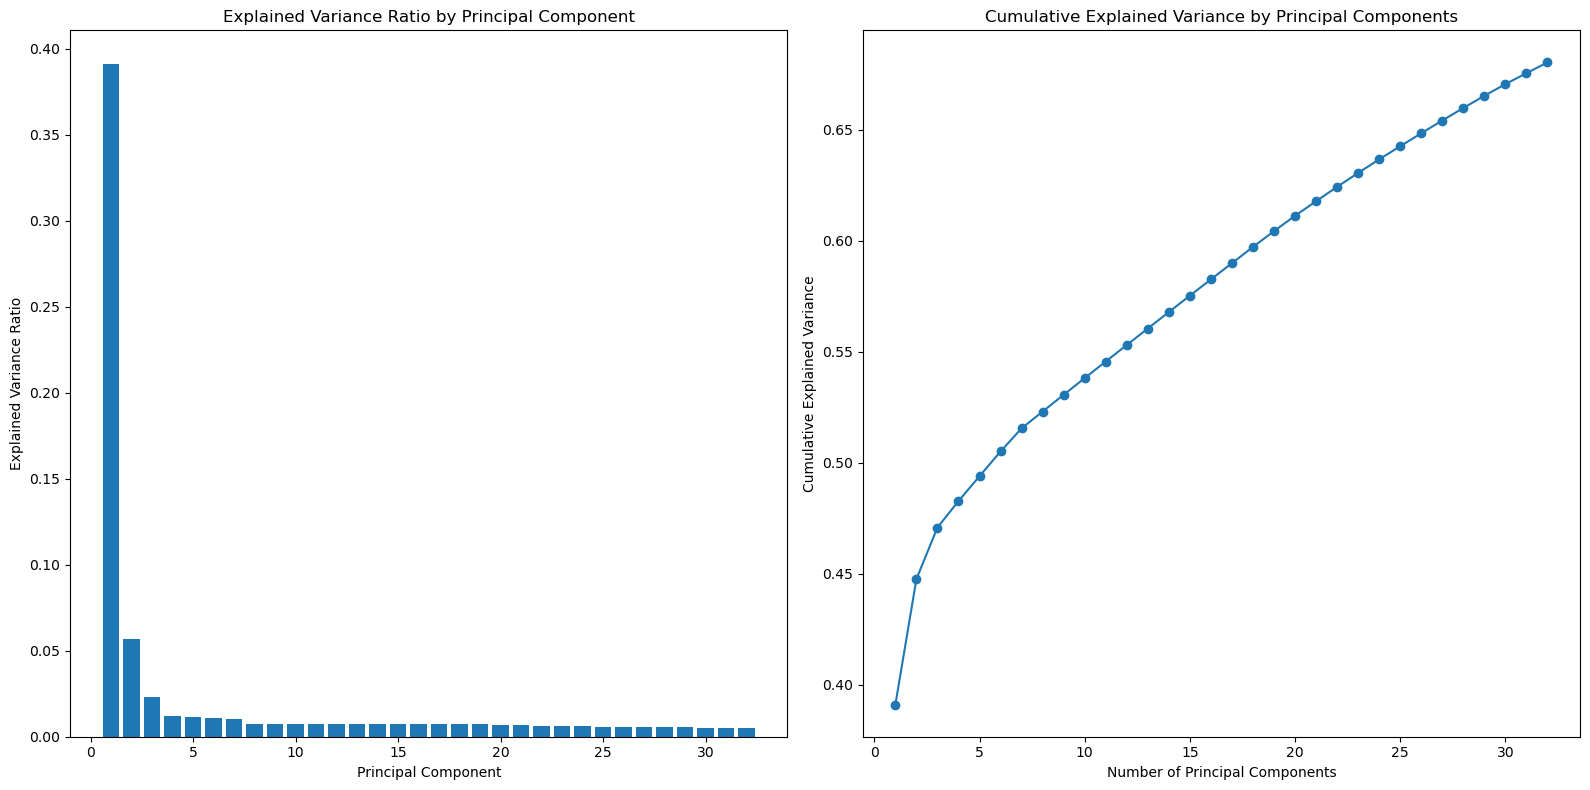

In [10]:
# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance Ratio by Principal Component')

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance by Principal Components')

# Display the figure
plt.tight_layout()
plt.show()